<a href="https://www.kaggle.com/code/lhy021/sydney-suburbs-reviews-eda?scriptVersionId=173144423" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Import library 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear aaalgebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sydney-suburbs-reviews/Sydney Suburbs Reviews.csv


### Import the dataset.

In [2]:
df = pd.read_csv(os.path.join(dirname, filename))

df.shape

(421, 30)

### Clean up columns

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace(r'[^\w\s]', '').str.strip().str.replace('(', '').str.replace(')', '')

### Get an overview of the dataset.

In [4]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
name,421,421,Hornsby,1
region,421,15,Western Suburbs,133
population_rounded*,421,110,"3,500",14
ethnic_breakdown_2016,421,421,"Chinese 17.1%, English 16.8%, Australian 14.0%...",1
median_house_price_2020,420,134,"$1,200,000.00",19
median_house_price_2021,409,100,"$2,000,000.00",16
%_change,421,196,25.00%,22
median_house_rent_per_week,402,129,$600.00,12
median_apartment_price_2020,299,127,"$650,000.00",9
median_apartment_rent_per_week,350,84,$510.00,15


In [5]:
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
postcode,421.0,2232.973872,235.654897,2000.0,2076.000,2153.0,2225.000,2770.0
avg._years_held,370.0,12.915676,2.684144,1.7,11.425,13.0,14.475,22.7
traffic,419.0,1.105012,1.892683,0.0,0.000,0.0,2.500,7.0
public_transport,420.0,1.683333,2.817810,0.0,0.000,0.0,4.000,9.0
affordability_rental,420.0,1.400000,2.336184,0.0,0.000,0.0,3.250,7.0
affordability_buying,420.0,1.102381,1.965452,0.0,0.000,0.0,2.000,7.0
nature,420.0,1.876190,3.104221,0.0,0.000,0.0,5.000,10.0
noise,420.0,1.680952,2.849967,0.0,0.000,0.0,4.000,10.0
things_to_see/do,420.0,1.585714,2.765244,0.0,0.000,0.0,3.000,10.0
family-friendliness,420.0,2.071429,3.393050,0.0,0.000,0.0,5.000,10.0


* ### Consider focusing on object columns and filtering for areas where the Chinese ethnic group constitutes over 20% of the population.
* ### Ignore numeric columns, assumed to represent website 

In [6]:
df_sub = df.select_dtypes('object').loc[df.ethnic_breakdown_2016.str.contains('Chinese') & (df.ethnic_breakdown_2016.str.extract('Chinese (\d+.\d+)', expand=False).astype(float) > 20)]

### Clean values during the process.

In [7]:
df_sub.replace({'\$': '', '\%': '', '\,': ''}, regex=True, inplace=True)

### Aggregate regions to a coarser level for easier analysis.

In [8]:
df_sub.region.value_counts().sort_index()

region
Eastern Suburbs       2
Inner East            1
Inner West            2
North Shore           6
Northern Suburbs      2
Southern Suburbs      7
Sydney City           3
Upper North Shore     1
Western Suburbs      10
Name: count, dtype: int64

In [9]:
mapping = {'Inner East': 'Inner',
           'Inner West': 'Inner',
           'Eastern Suburbs': 'Eastern',
           'Northern Suburbs': 'Northern',
           'Southern Suburbs': 'Southern',
           'Sydney City': 'Inner',
           'Western Suburbs': 'Western', 
           'North Shore': 'Northern', 
           'Upper North Shore': 'Northern'}

df_sub.region = df_sub.region.map(mapping)

<Axes: title={'center': 'Bar Plot'}, xlabel='region'>

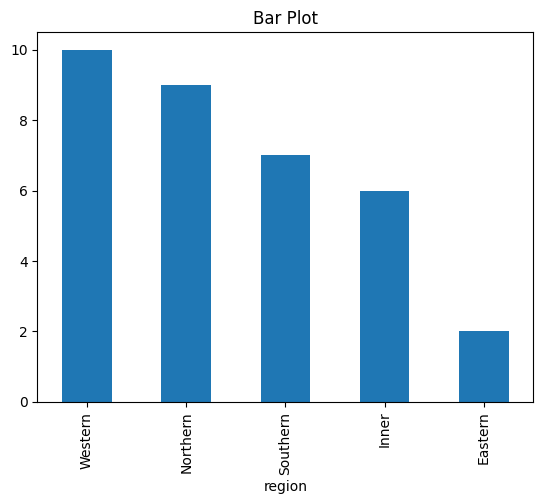

In [10]:
df_sub.region.value_counts().plot(kind='bar', title='Bar Plot')

### Perform data cleaning on cell values and column names.

In [11]:
df_sub.rename(columns = {'population_rounded*':'population'},inplace=True)

df_sub.population = df_sub.population.replace(',','').astype(int)
df_sub.median_house_price_2021 = df_sub.median_house_price_2021.replace('-',np.nan).astype(float)
df_sub.median_apartment_price_2020 = df_sub.median_apartment_price_2020.replace('-',np.nan).astype(float)

### Generate a line chart comparing house and apartment prices across regions.

<Axes: xlabel='region'>

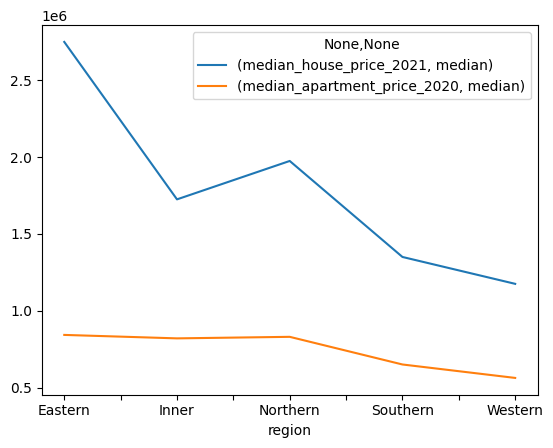

In [12]:
df_sub.groupby('region').agg({'median_house_price_2021': ['median'],'median_apartment_price_2020': ['median']}).plot(kind='line')

### Examine each region (Eastern, Northern, Western) representing high to low-end markets individually.

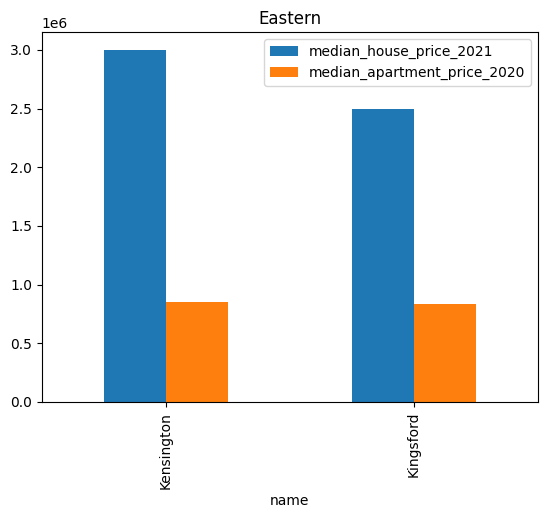

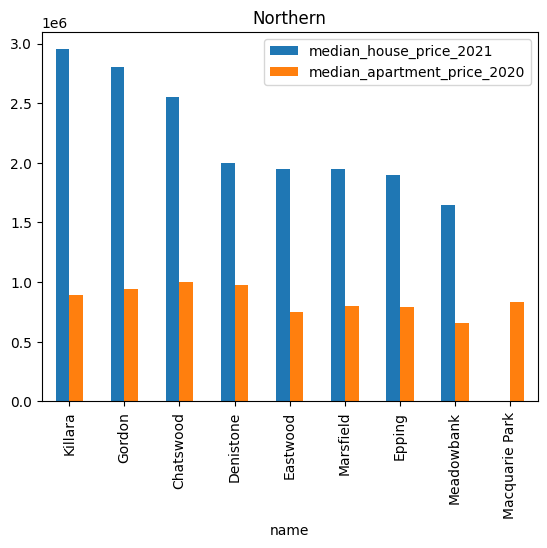

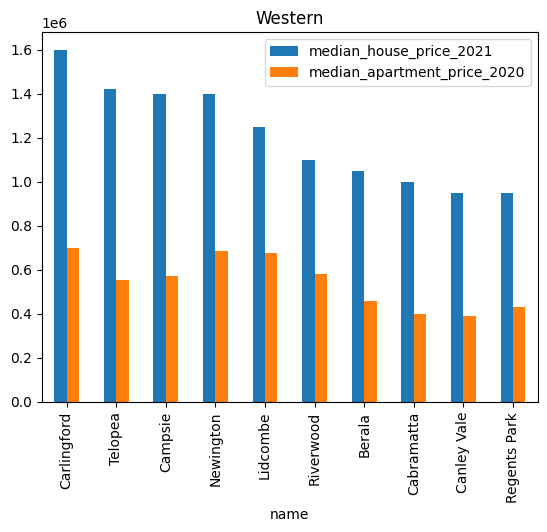

In [13]:
cols = ['name', 'median_house_price_2021','median_apartment_price_2020']

for r in ['Eastern','Northern','Western']:
    df_sub.loc[df_sub.region==r,cols].\
    sort_values('median_house_price_2021', ascending=False).\
    plot(x='name', kind='bar', title=r)

### Filter suburbs where the median house price indicates a "mansion" (e.g., $2 million). 

<Axes: xlabel='name'>

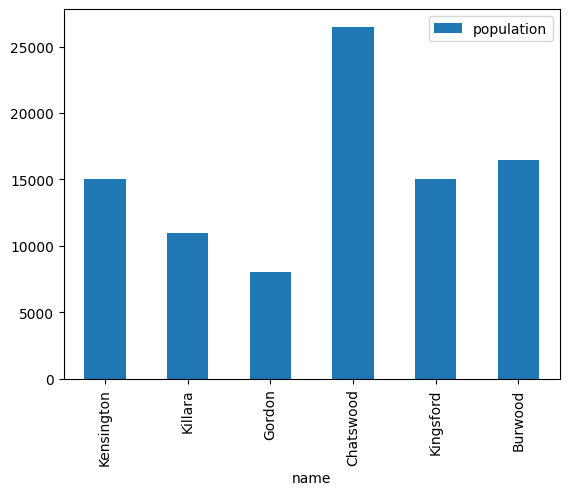

In [14]:
col2 = ['name','population','median_house_price_2021','median_apartment_price_2020']
df_sub.loc[df_sub.median_house_price_2021>2000000,col2].sort_values('median_house_price_2021', ascending = False).plot(x = 'name', y= 'population',kind = 'bar')

### Examine suburbs where the population falls within the top 75th percentile among all Chinese-dominant suburbs.

<Axes: xlabel='name', ylabel='population'>

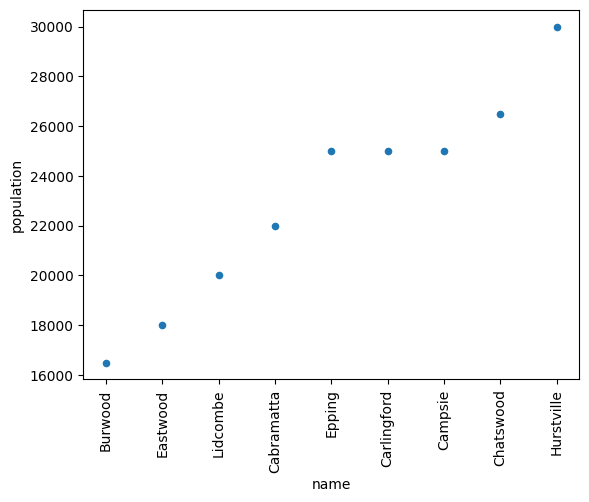

In [15]:
df_sub.loc[df_sub.population>df_sub.population.quantile(0.75),col2].sort_values('population').plot.scatter(x='name',y='population', rot=90)

<Axes: xlabel='name', ylabel='median_house_price_2021'>

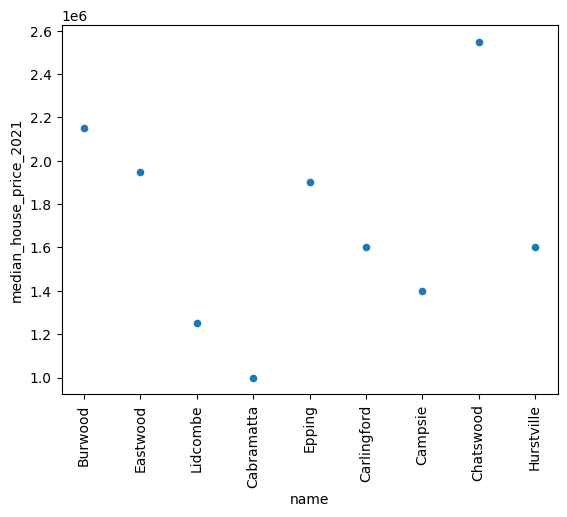

In [16]:
df_sub.loc[df_sub.population>df_sub.population.quantile(0.75),col2].sort_values('population').plot.scatter(x='name',y='median_house_price_2021', rot=90)

<Axes: xlabel='name', ylabel='median_apartment_price_2020'>

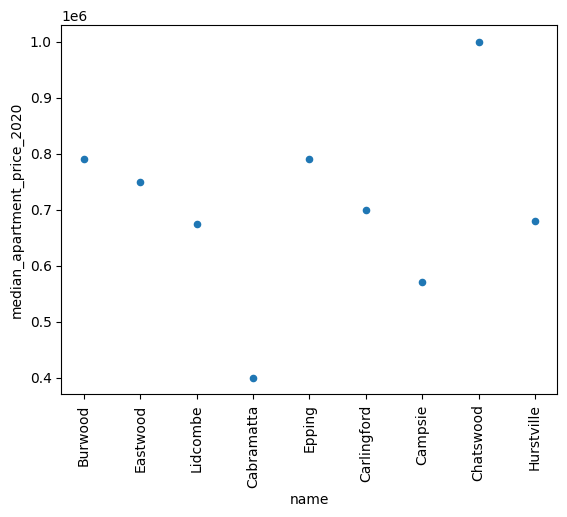

In [17]:
df_sub.loc[df_sub.population>df_sub.population.quantile(0.75),col2].sort_values('population').plot.scatter(x='name',y='median_apartment_price_2020', rot=90)

In [18]:
df_sub.loc[:,['population','median_house_price_2021','median_apartment_price_2020']].median().T

population                       10750.0
median_house_price_2021        1600000.0
median_apartment_price_2020     692500.0
dtype: float64

### Finding
### * Based on the data analysis, it appears that Carlingford, Campsie, and Hurstville offer the best value for living in a Chinese-dominant suburb.
### * While Chatswood might have the highest population living in $2 million mansions, perceptions of value may differ among residents.
### * Remember, it's never a good idea to put all your trust in just one dataset. Keep a healthy dose of skepticism and consider other sources too.
### * Check out other visualization libraries like Matplotlib or Seaborn since Pandas' plot method has its limitations.